In [1]:
!pip install xgboost

In [2]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump


In [3]:
X_train = pd.read_csv("../../Split Data/Training Dataset/X_train #1.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../Split Data/Training Dataset/y_train #1.csv", index_col=0)
X_val = pd.read_csv("../../Split Data/Validation Dataset/X_val #1.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../Split Data/Validation Dataset/y_val #1.csv", index_col=0)
X_test = pd.read_csv("../../Split Data/Testing Dataset/X_test #1.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../Split Data/Testing Dataset/y_test #1.csv", index_col=0)

In [4]:
model = XGBClassifier(objective='binary:logistic', max_depth = 3, n_estimators = 1000, early_stopping_rounds=5,)

In [5]:
model.fit(X_train, y_train,  verbose = True, eval_set=[(X_val,y_val)])

[0]	validation_0-logloss:0.63032
[1]	validation_0-logloss:0.58826
[2]	validation_0-logloss:0.56216
[3]	validation_0-logloss:0.54286
[4]	validation_0-logloss:0.52897
[5]	validation_0-logloss:0.51389
[6]	validation_0-logloss:0.50231
[7]	validation_0-logloss:0.49474
[8]	validation_0-logloss:0.48669
[9]	validation_0-logloss:0.48032
[10]	validation_0-logloss:0.47576
[11]	validation_0-logloss:0.46996
[12]	validation_0-logloss:0.46582
[13]	validation_0-logloss:0.46256
[14]	validation_0-logloss:0.45848
[15]	validation_0-logloss:0.45527
[16]	validation_0-logloss:0.45272


[17]	validation_0-logloss:0.44950
[18]	validation_0-logloss:0.44630
[19]	validation_0-logloss:0.44469
[20]	validation_0-logloss:0.44323
[21]	validation_0-logloss:0.44175
[22]	validation_0-logloss:0.43940
[23]	validation_0-logloss:0.43820
[24]	validation_0-logloss:0.43707
[25]	validation_0-logloss:0.43595
[26]	validation_0-logloss:0.43529
[27]	validation_0-logloss:0.43443
[28]	validation_0-logloss:0.43382
[29]	validation_0-logloss:0.43305
[30]	validation_0-logloss:0.43226
[31]	validation_0-logloss:0.43170
[32]	validation_0-logloss:0.43117
[33]	validation_0-logloss:0.43065
[34]	validation_0-logloss:0.42907
[35]	validation_0-logloss:0.42805
[36]	validation_0-logloss:0.42751
[37]	validation_0-logloss:0.42705
[38]	validation_0-logloss:0.42681
[39]	validation_0-logloss:0.42656
[40]	validation_0-logloss:0.42613
[41]	validation_0-logloss:0.42569
[42]	validation_0-logloss:0.42553
[43]	validation_0-logloss:0.42518
[44]	validation_0-logloss:0.42481
[45]	validation_0-logloss:0.42469
[46]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [6]:
y_pred = model.predict(X_test)

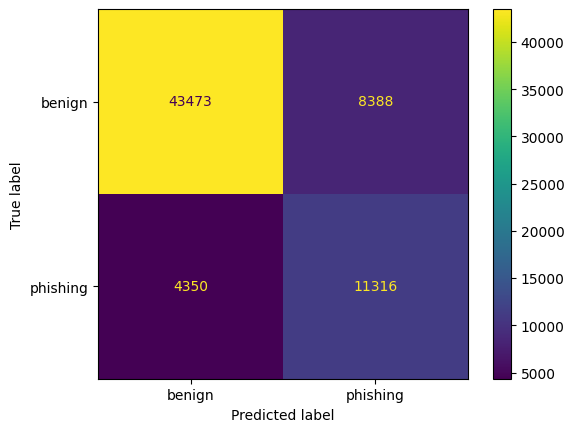

In [7]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [8]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [9]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8113643431516282, 'Precision': 0.574299634591961, 'Recall': 0.7223286097280736, 'F1_score': 0.6398642917726888}


In [10]:
df = pd.read_csv("Metrics of Dataset #1.csv")

In [11]:
metrics = pd.DataFrame({"Model": "XGBoost", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [12]:
df = pd.concat([df, metrics], ignore_index=True)

In [13]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.718824,0.433593,0.692072,0.533156
1,Random Forest,0.824603,0.604040,0.708222,0.651995
2,XGBoost,0.811364,0.574300,0.722329,0.639864


In [14]:
df.to_csv("Metrics of Dataset #1.csv", index=False)

In [15]:
dump(model, 'XGBoost #1.joblib')

['XGBoost #1.joblib']